In [2]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
premiums =  pd.read_csv("test_66516Ee.csv")
premiums.set_index('id', inplace=True)
premiums = premiums[['premium']]
premiums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34224 entries, 649 to 93826
Data columns (total 1 columns):
premium    34224 non-null int64
dtypes: int64(1)
memory usage: 534.8 KB


In [4]:
probs = pd.read_csv("pred.csv")
probs.set_index('id', inplace=True)
probs.head()

,renewal,incentives
id,,
649,0.986124,200.0
81136,0.979425,200.0
70762,0.921332,200.0
53935,0.969518,200.0
15476,0.959812,200.0


In [5]:
def func_creator(probability, premiums):
    def fun(Inc):
        Eff = 10 * (1- np.exp(-Inc/400))
        Imp = 20 * (1- np.exp(- Eff/5))
        #print(probability)
        #print(Imp)
        new_prob = probability * (1 + Imp/100)
        new_prob[np.greater(new_prob, 1)] = 1
        #print(new_prob)

        return -(new_prob * premiums - Inc)
    return fun

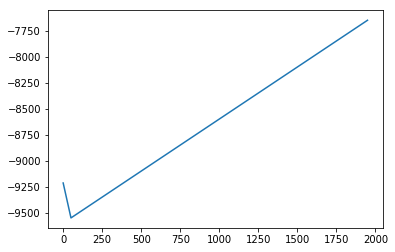

In [6]:
x = np.arange(0, 2000, 50)
f = func_creator (probs['renewal'][15476], premiums['premium'][15476])
plt.plot(x, f(x))

In [7]:
res = minimize(f, 1, method='L-BFGS-B', bounds=((1, None),))
print(res)

      fun: array([-9550.02359008])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.00008037])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 134
      nit: 7
   status: 0
  success: True
        x: array([49.97640992])


In [8]:
for id in probs.index:
    f = func_creator (probs['renewal'][id], premiums['premium'][id])
    res = minimize(f, 1, method='L-BFGS-B', bounds=((1, None),))
    probs['incentives'][id] = res.x[0]
    
probs.head()

,renewal,incentives
id,,
649,0.986124,14.863728
81136,0.979425,22.833800
70762,0.921332,130.497319
53935,0.969518,35.757348
15476,0.959812,49.976410


In [10]:
# Uncertainty adjustment in renewal premium predictor
probs['incentives'] = probs['incentives'] + 100
probs.to_csv("with_inc_new.csv")